# Analyzing NYC Job Market in Python

We will find out the most required jobs and skills based on new york job postings [dataset](https://catalog.data.gov/dataset/nyc-jobs-26c80/resource/e41b5332-f9f3-433f-95e2-7701104ba29f)
with some modification, using Pandas and Matplotlib libraries.

## Steps

1. Identify Data Types
2. Explore Each Variable
3. Data Cleaning
4. Feature Engineering
5. Find Correlations

## Introduce the Data

Import data by clicking **insert to code** from **Find and add data** on the right

In [1]:
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_ed242f131190443faa76f72cd4fca435 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_wifFQR0fRzlVwZ1D1LufsJ4Amj71z1p8PpJ2CsF2g4Y',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ed242f131190443faa76f72cd4fca435.get_object(Bucket='mawhibads-donotdelete-pr-f5zm6wdjmhbe8w',Key='NYC_Jobs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,JobID,Agency,PostingType,#OfPositions,BusinessTitle,CivilServiceTitle,TitleCodeNo,Level,JobCategory,FullOrPartTime,...,AdditionalInformation,ToApply,Hours,WorkLocation1,RecruitmentContact,ResidencyRequirement,PostingDate,PostUntil,PostingUpdated,ProcessDate
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,,,...,"Salary range for this position is: $42,405 - $...",,,,NaN,New York City residency is generally required ...,2011-06-24T00:00:00,NaN,2011-06-24T00:00:00,2018-07-17T00:00:00
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,,F,...,,"In addition to applying through this website, ...",,,NaN,New York City residency is generally required ...,2012-01-26T00:00:00,NaN,2012-01-26T00:00:00,2018-07-17T00:00:00
2,102221,DEPT OF ENVIRONMENT PROTECTION,External,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
3,102221,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Project Specialist,ENVIRONMENTAL ENGINEERING INTE,20616,0,,F,...,Appointments are subject to OMB approval,click the apply now button,35 hours per week/day,,NaN,New York City Residency is not required for th...,2012-06-21T00:00:00,NaN,2012-09-07T00:00:00,2018-07-17T00:00:00
4,114352,DEPT OF ENVIRONMENT PROTECTION,Internal,5,Deputy Plant Chief,SENIOR STATIONARY ENGINEER (EL,91639,0,,F,...,Appointments are subject to OMB approval Fo...,"Click ""Apply Now"" button",40 per week / day,Various,NaN,New York City residency is generally required ...,2012-12-12T00:00:00,NaN,2012-12-13T00:00:00,2018-07-17T00:00:00


## Step 1: Identify Data Types

In [2]:
# View Datatypes of The Columns
df.dtypes

JobID                        int64
Agency                      object
PostingType                 object
#OfPositions                 int64
BusinessTitle               object
CivilServiceTitle           object
TitleCodeNo                 object
Level                       object
JobCategory                 object
FullOrPartTime              object
SalaryRangeFrom            float64
SalaryRangeTo              float64
SalaryFrequency             object
WorkLocation                object
WorkUnit                    object
JobDescription              object
MinimumQualRequirements     object
PreferredSkills             object
AdditionalInformation       object
ToApply                     object
Hours                       object
WorkLocation1               object
RecruitmentContact         float64
ResidencyRequirement        object
PostingDate                 object
PostUntil                   object
PostingUpdated              object
ProcessDate                 object
dtype: object

## Step 2: Explore Each Variable

#### A. Numerical Variables

In [3]:
# Central Tendency
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
JobID,3328.0,323362.505409,42823.211189,87990.00,315986.0,342074.0,348445.0,354182.0
#OfPositions,3328.0,2.374099,8.877066,1.00,1.0,1.0,1.0,200.0
SalaryRangeFrom,3328.0,56518.729430,27362.267773,0.00,46747.0,54643.0,69929.0,209585.0
SalaryRangeTo,3328.0,79868.402953,40550.988142,10.36,57958.0,78177.0,101148.0,224749.0
RecruitmentContact,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### B. Categorical Variables

In [4]:
PostingTypCount= df.groupby('PostingType').PostingType.count()
print(PostingTypCount)
print()

SalaryFrequencCount= df.groupby('SalaryFrequency').SalaryFrequency.count()
print(SalaryFrequencCount)
print ()

FullOrPartTimCount= df.groupby('FullOrPartTime').FullOrPartTime.count()
print(FullOrPartTimCount)

PostingType
External    1500
Internal    1828
Name: PostingType, dtype: int64

SalaryFrequency
Annual    3030
Daily       38
Hourly     260
Name: SalaryFrequency, dtype: int64

FullOrPartTime
      251
F    2872
P     205
Name: FullOrPartTime, dtype: int64


In [5]:
# Explore categorical variables 
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Agency' has 50 unique categories
Feature 'PostingType' has 2 unique categories
Feature 'BusinessTitle' has 1416 unique categories
Feature 'CivilServiceTitle' has 335 unique categories
Feature 'TitleCodeNo' has 351 unique categories
Feature 'Level' has 17 unique categories
Feature 'JobCategory' has 133 unique categories
Feature 'FullOrPartTime' has 3 unique categories
Feature 'SalaryFrequency' has 3 unique categories
Feature 'WorkLocation' has 204 unique categories
Feature 'WorkUnit' has 660 unique categories
Feature 'JobDescription' has 1725 unique categories
Feature 'MinimumQualRequirements' has 394 unique categories
Feature 'PreferredSkills' has 1324 unique categories
Feature 'AdditionalInformation' has 637 unique categories
Feature 'ToApply' has 1180 unique categories
Feature 'Hours' has 195 unique categories
Feature 'WorkLocation1' has 217 unique categories
Feature 'ResidencyRequirement' has 61 unique categories
Feature 'PostingDate' has 454 unique categories
Feature 'Post

## Step 3: Data Cleaning

In [6]:
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False).head()

RecruitmentContact         3328
PostUntil                  2018
MinimumQualRequirements      12
ProcessDate                   2
AdditionalInformation         2
dtype: int64

#### 1. Deletion

In [7]:
# Delete duplicates
df = df.drop_duplicates('JobID')

#### 2. Replace missing values

In [8]:
# Replace empty FullOrPartTime cells with most frequent value (F)
df['FullOrPartTime'] = df['FullOrPartTime'].str.replace(' ', 'F')

## Step 4: Feature Engineering

In [9]:
#Add 3 extra columns to dataframe: HasExternalPosting, SalaryMidpoint, AnnualizedSalary and TotalPositionExpenditure

#Add HasExternalPosting column
external_posted_job_ids = df[df['PostingType'] == 'External']['JobID'].unique() 
df['HasExternalPosting'] = [True if job_id in external_posted_job_ids else False for job_id in df['JobID']]

#Add SalaryMidpoint column
df['SalaryMidpoint'] = df['SalaryRangeFrom'] + (df['SalaryRangeTo'] - df['SalaryRangeFrom'])/2

#Add AnnualizedSalary column to annualize Hourly and Daily rates
df.loc[df['SalaryFrequency'] =='Annual', 'AnnualizedSalary'] = df.loc[df['SalaryFrequency'] =='Annual', 'SalaryMidpoint']
df.loc[df['SalaryFrequency'] =='Hourly', 'AnnualizedSalary'] = df.loc[df['SalaryFrequency'] =='Hourly', 'SalaryMidpoint'] * 8 * 5 * 50
df.loc[df['SalaryFrequency'] =='Daily', 'AnnualizedSalary'] = df.loc[df['SalaryFrequency'] =='Daily', 'SalaryMidpoint'] * 5 * 50

#Add TotalPositionExpenditure column
df['TotalPositionExpenditure'] = df['#OfPositions'] * df['AnnualizedSalary']

## Step 5: Find Correlations

### Salaries vs #OfPositions

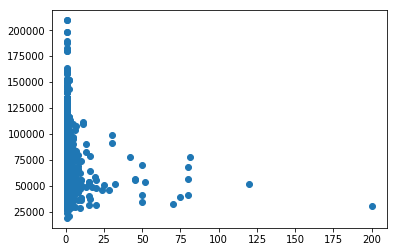

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x="#OfPositions", y="AnnualizedSalary", data=df) # Salary with Hours

### Salaries by Agency
Salaries ranked by Agency are shown below. There are some notable omissions in the dataset - while the Fire Deparment has a much larger average salary at \$85k vs \$52.8k, neither police officers or firemen are listed.

In [14]:
grouped_df = df.groupby('Agency').sum()
grouped_df['AverageSalary'] = grouped_df['TotalPositionExpenditure'] / grouped_df['#OfPositions']

#Create dataset for 'Salaries by Agency' chart
ordered_salaries = grouped_df[['AverageSalary']].sort_values('AverageSalary', ascending=True)
ordered_salaries = ordered_salaries.reset_index()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


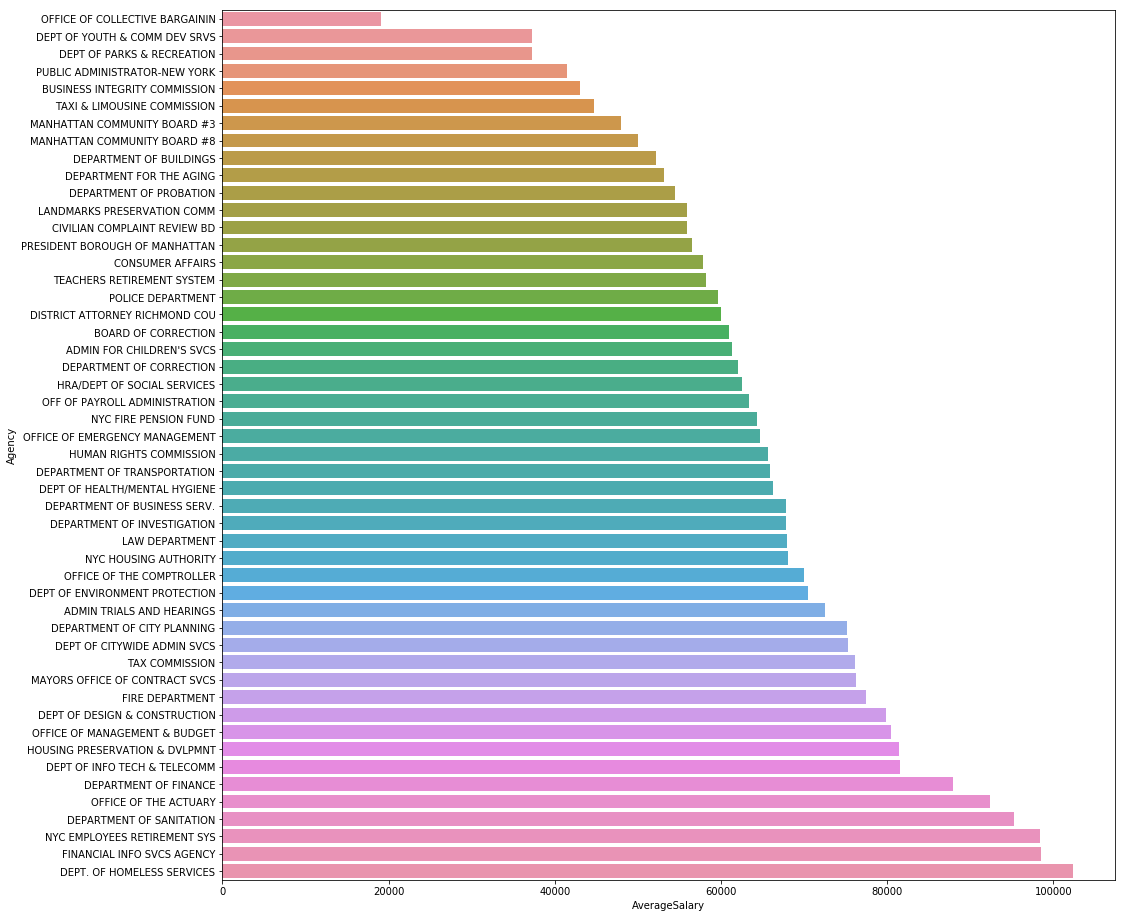

In [12]:
# libraries
import seaborn as sns

# Change figure size
plt.figure(figsize=(16,16))

# Create a bar plot
sns.barplot(x='AverageSalary', y='Agency',
            data=ordered_salaries)

# Display the bar graph
plt.show()

## More Data Exploration 

### Open Positions

The top third agency by open positions is the **Department of Parks and Recreation** which is currently hiring hundreds of seasonal park workers at a low hourly rate. This also explains the department's low placement in the average salary chart (2nd lowest).

While **Department of Parks and Recreation** has more jobs than the **Department of Health and Mental Hygiene**, the latter has many more types of jobs listed - Health has 578 unique jobs listed while parks has 33.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


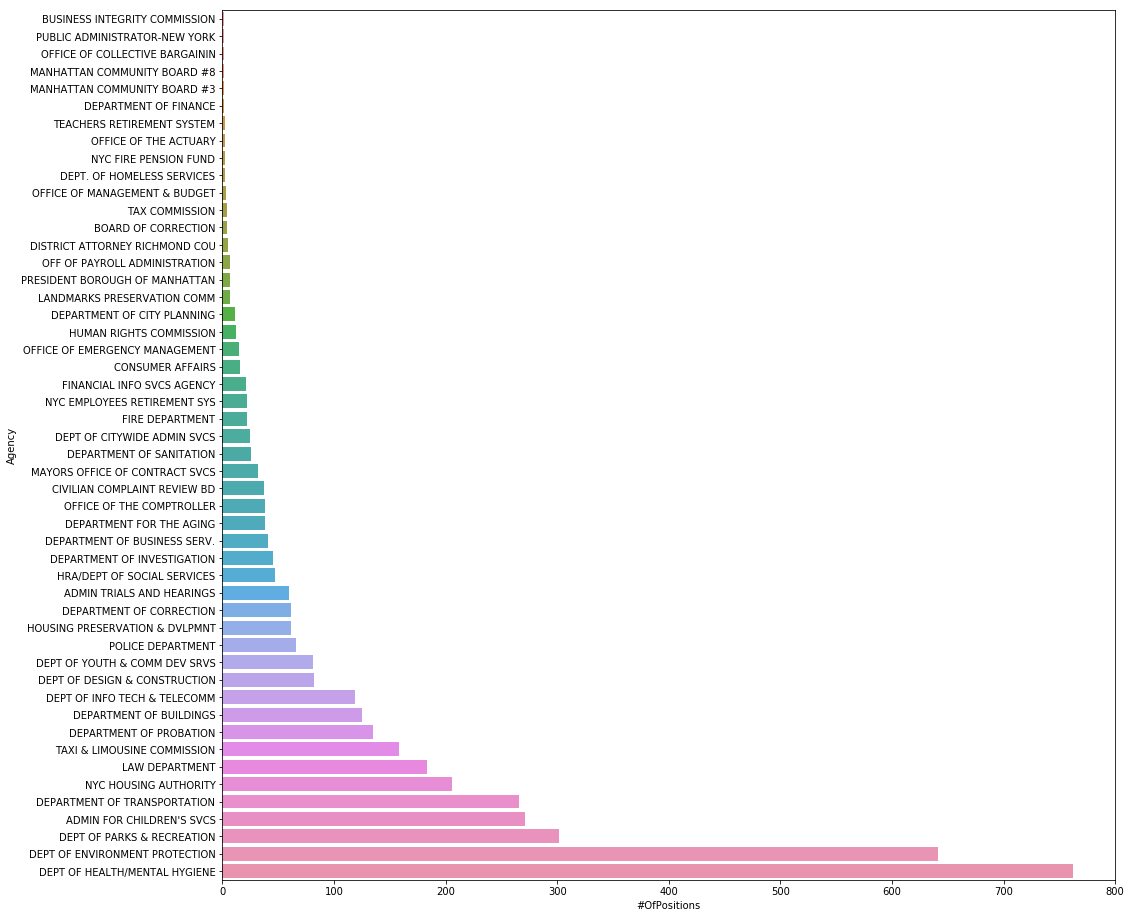

In [54]:
#Create dataset for position count chart
ordered_position_counts = grouped_df[['#OfPositions']].sort_values('#OfPositions', ascending=True)
ordered_position_counts = ordered_position_counts.reset_index()

# Change figure size
plt.figure(figsize=(16,16))

# Create a bar plot
sns.barplot(x="#OfPositions", y="Agency",
            data=ordered_position_counts)

# Display the bar graph
plt.show()

### Top 10 Job Categories
Topping the list of open positions by category is the Health which has currently around 500 of positions.

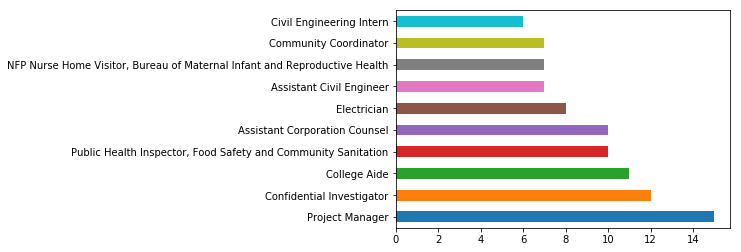

In [15]:
# visualise bar chart for the top 20 job categories
# doc on plot function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
df['BusinessTitle'].value_counts().nlargest(10).plot(kind='barh')

### Difficulty to Fill

We are able to approximate the difficulty to fill a position by how long it is left unfilled. The top 25 jobs with the longest time between being updated and posted are below.

The top position at 1167 days is a full time position paying around $35,000 with a job title of [Law Student](https://a127-jobs.nyc.gov/index_new.html?keyword=124287).

In [16]:
#Create df that shows difference between posting date and updated date
time_df = df[['JobID',
              'Agency',
              '#OfPositions', 
              'BusinessTitle', 
              'SalaryFrequency',
              'SalaryMidpoint', 
              'PostingDate',
              'PostingUpdated']]
time_df['PostingDate'] = pd.to_datetime(time_df['PostingDate'])
time_df['PostingUpdated'] = pd.to_datetime(time_df['PostingUpdated'])
time_df['DaysOpen'] = time_df['PostingUpdated'] - time_df['PostingDate']

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [17]:
#show dataframe of top 25 most difficult to fill positions (using index as rank)
time_df_top_25 = time_df.sort_values('DaysOpen', ascending=False).head(25).set_index([[x for x in range(1,26)]])
time_df_top_25

,JobID,Agency,#OfPositions,BusinessTitle,SalaryFrequency,SalaryMidpoint,PostingDate,PostingUpdated,DaysOpen
1,124287,LAW DEPARTMENT,1,LAW STUDENT,Annual,35314.00000,2013-08-01,2016-10-11,1167 days
2,233005,DEPT OF INFO TECH & TELECOMM,1,Systems Access Management Engineer,Annual,88626.50000,2016-03-22,2018-07-16,846 days
3,191317,DEPT OF ENVIRONMENT PROTECTION,1,Design Engineer,Annual,73133.00000,2015-04-29,2017-03-27,698 days
4,252119,DEPT OF ENVIRONMENT PROTECTION,4,ASSISTANT CIVIL ENGINEER,Annual,64495.00000,2016-08-11,2018-06-27,685 days
5,193893,DEPT OF ENVIRONMENT PROTECTION,1,Water Resources Analyst,Annual,75065.00000,2015-05-21,2017-03-27,676 days
6,238995,DEPT OF INFO TECH & TELECOMM,2,Integration Support Engineer,Annual,88677.00000,2016-05-11,2018-03-09,667 days
7,250368,DEPT OF ENVIRONMENT PROTECTION,1,Environmental Health & Safety Incident Investi...,Annual,76234.00000,2016-08-03,2018-04-25,630 days
8,243640,ADMIN FOR CHILDREN'S SVCS,2,Juvenile Justice Trainer,Annual,99521.00000,2016-07-08,2018-01-09,550 days
9,249532,DEPT OF INFO TECH & TELECOMM,5,SQL/Oracle Database Administrator,Annual,96661.50000,2016-07-29,2018-01-16,536 days
10,278130,DEPT OF ENVIRONMENT PROTECTION,5,Emergency Manager,Annual,65000.00000,2017-01-12,2018-06-21,525 days


### Most Jobs Posted Internally

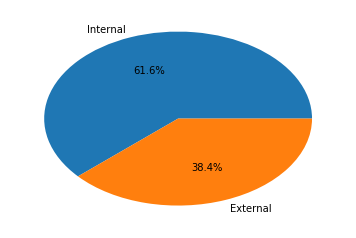

In [18]:
# Store count of internal and external job counters
InternalCount= df['PostingType'].str.contains('Internal').sum()
ExternalCount= df['PostingType'].str.contains('External').sum()

# Create arrays for pie titles and values
PostingTypes = ['Internal','External']
Count = [InternalCount, ExternalCount]

# Draw pie chart
plt.pie(Count, labels=PostingTypes, autopct='%1.1f%%')
plt.show()

### Full Time Jobs Is More Common 

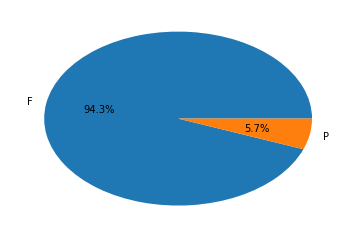

In [19]:
# Store count of full and part time job
FullCount= df['FullOrPartTime'].str.contains('F').sum()
PartCount= df['FullOrPartTime'].str.contains('P').sum()

# Create arrays for title and count of most frequent job categories
FullOrPartTime = ['F','P']
Count = [FullCount, PartCount]

# Draw pie chart
plt.pie(Count, labels=FullOrPartTime, autopct='%1.1f%%')
plt.show()

### Available **Work Units** in **Wards Island**

In [20]:
df_WorkLocation= df.loc[df['WorkLocation'].isin(['Wards Island, N.Y.'])]
print(df_WorkLocation['WorkUnit'])

4             Wards Island
15          Marine Section
44          Marine Section
83          Marine Section
846     Plant Construction
1090        Marine Section
2547    Electrical Section
Name: WorkUnit, dtype: object


### Jobs that require *MBA*

In [21]:
df_Skills= df.loc[df['PreferredSkills'].str.contains("MBA")] 
print(df_Skills['BusinessTitle'])

8     Director, Strategic Sourcing
21    Director, Strategic Sourcing
Name: BusinessTitle, dtype: object
